score_investigation
------------------------

embedding 종류 그리고 score 방식에서 



## Environment

In [2]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

import pandas as pd
import pickle
import numpy as np
import sys
import os


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.append('/host/projects/sv_experiments/sv_system/')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
def key2df(keys, delimeter="-"):
    key_df = pd.DataFrame(keys, columns=['key'])
    key_df['spk'] = key_df.key.apply(lambda x: x.split(delimeter)[0])
    key_df['label'] = key_df.groupby('spk').ngroup()
    key_df['origin'] = key_df.spk.apply(lambda x: 'voxc2' if x.startswith('id') else 'voxc1')
    
    return key_df

## Scores

In [5]:
import torch
from torch.nn.functional import cosine_similarity

In [6]:
def read_score(score_path):
    score = pd.read_csv(score_path, 
                    sep=' ', header=None)
    score.columns = ['enroll', 'test', 'score']
    
    return score

In [8]:
cosine_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc2/voxc2_mfcc30_best/scores/cosine_scores")
lda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc2/voxc2_mfcc30_best/scores/lda_scores")
plda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc2/voxc2_mfcc30_best/scores/plda_scores")

In [7]:
cosine_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_mfcc30_best/scores/cosine_scores")
lda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_mfcc30_best/scores/lda_scores")
plda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_mfcc30_best/scores/plda_scores")

In [150]:
cosine_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_fbank64_vad_best/plda_scores/cosine_scores")
lda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_fbank64_vad_best/plda_scores/lda_scores")
plda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc1/voxc1_fbank64_vad_best/plda_scores/plda_scores")

In [10]:
cosine_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc12/voxc12_mfcc30_best/plda_scores/cosine_scores")
lda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc12/voxc12_mfcc30_best/plda_scores//lda_scores")
plda_score = read_score(
    "/host/projects/sv_experiments/sv_system/embeddings/voxc12/voxc12_mfcc30_best/plda_scores//plda_scores")

In [11]:
voxc2_hard_trial = pd.read_pickle("/dataset/SV_sets/voxceleb12/dataframes/voxc2_trials/voxc2_hard_trials.pkl")

In [8]:
voxc1_trial = pd.read_pickle("/dataset/SV_sets/voxceleb12/dataframes/voxc12_test_trial.pkl")

In [151]:
voxc1_fbank_trial = pd.read_pickle("/dataset/SV_sets/voxceleb12/dataframes/voxc12_test_trial.pkl")

In [11]:
voxc12_trial = pd.read_pickle("/dataset/SV_sets/voxceleb12/dataframes/voxc12_test_trial.pkl")

In [9]:
voxc1_trial['cosine_score'] = cosine_score.score
voxc1_trial['lda_score'] = lda_score.score
voxc1_trial['plda_score'] = plda_score.score

In [152]:
voxc1_fbank_trial['cosine_score'] = cosine_score.score
voxc1_fbank_trial['lda_score'] = lda_score.score
voxc1_fbank_trial['plda_score'] = plda_score.score

In [12]:
voxc12_trial['cosine_score'] = cosine_score.score
voxc12_trial['lda_score'] = lda_score.score
voxc12_trial['plda_score'] = plda_score.score

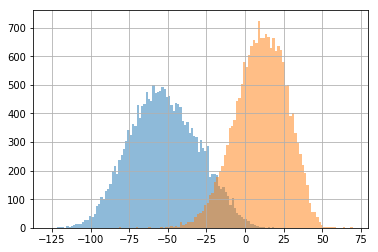

In [13]:
voxc1_trial.groupby('label').plda_score.hist(alpha=0.5, bins=100)
plt.show()

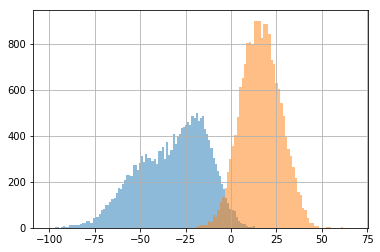

In [14]:
voxc12_trial.groupby('label').plda_score.hist(alpha=0.5, bins=100)
plt.show()

### voxc1 mfcc30

In [126]:
voxc1_pos_score = voxc1_trial[voxc1_trial.label==1].plda_score
voxc1_neg_score = voxc1_trial[voxc1_trial.label==0].plda_score

from eval.score_utils import compute_eer
eer, voxc1_thres = compute_eer(voxc1_pos_score, voxc1_neg_score)

eer:5.885% at threshold -16.7609


In [132]:
clf_result = voxc1_trial.plda_score.apply(lambda x: 1 if x > voxc1_thres else 0)
voxc1_trial['result'] = clf_result == voxc1_trial.label

In [186]:
# voxc1_bad_pos_trial = voxc1_trial[(voxc1_trial.label==1) & (voxc1_trial.plda_score < voxc1_thres)]
# voxc1_bad_neg_trial = voxc1_trial[(voxc1_trial.label==0) & (voxc1_trial.plda_score > voxc1_thres)]
voxc1_bad_trial = voxc1_trial[~voxc1_trial.result]

### voxc1 fbank64

In [153]:
voxc1_fbank_pos_score = voxc1_fbank_trial[voxc1_fbank_trial.label==1].plda_score
voxc1_fbank_neg_score = voxc1_fbank_trial[voxc1_fbank_trial.label==0].plda_score

from eval.score_utils import compute_eer
eer, voxc1_fbank_thres = compute_eer(voxc1_fbank_pos_score, voxc1_fbank_neg_score)

eer:4.979% at threshold -4.4159


In [154]:
voxc1_fbank_bad_pos_trial = voxc1_fbank_trial[(voxc1_fbank_trial.label==1) & (voxc1_fbank_trial.plda_score < voxc1_fbank_thres)]
voxc1_fbank_bad_neg_trial = voxc1_fbank_trial[(voxc1_fbank_trial.label==0) & (voxc1_fbank_trial.plda_score > voxc1_fbank_thres)]
voxc1_fbank_bad_trial = pd.concat([voxc1_fbank_bad_pos_trial, voxc1_fbank_bad_neg_trial])

In [155]:
clf_result = voxc1_fbank_trial.plda_score.apply(lambda x: 1 if x > voxc1_fbank_thres else 0)
voxc1_fbank_trial['result'] = clf_result == voxc1_fbank_trial.label

### voxc12

In [133]:
voxc12_pos_score = voxc12_trial[voxc12_trial.label==1].plda_score
voxc12_neg_score = voxc12_trial[voxc12_trial.label==0].plda_score

from eval.score_utils import compute_eer
eer, voxc12_thres = compute_eer(voxc12_pos_score, voxc12_neg_score)

eer:3.150% at threshold -2.9430


In [156]:
voxc12_bad_pos_trial = voxc12_trial[(voxc12_trial.label==1) & (voxc12_trial.plda_score < voxc12_thres)]
voxc12_bad_neg_trial = voxc12_trial[(voxc12_trial.label==0) & (voxc12_trial.plda_score > voxc12_thres)]
voxc12_bad_trial = pd.concat([voxc12_bad_pos_trial, voxc12_bad_neg_trial])

In [135]:
clf_result = voxc12_trial.plda_score.apply(lambda x: 1 if x > voxc12_thres else 0)
voxc12_trial['result'] = clf_result == voxc1_trial.label

### voxc1_mfcc30과 voxc12 관계 분석

voxc1_mfcc30에서 맞춘것 중에 추가로 481개 틀리고, 틀린것 2222개 중에 1513개를 새로 맞춰서 최종적으로 1190개를 틀렸다.

In [136]:
voxc1_trial.result.value_counts()

True     35498
False     2222
Name: result, dtype: int64

In [137]:
voxc12_trial.result.value_counts()

True     36530
False     1190
Name: result, dtype: int64

In [142]:
# voxc1에서 틀린 것 중에 voxc12가 맞춘것

voxc12_trial.iloc[voxc1_trial[voxc1_trial.result == 0].index].result.value_counts()

True     1513
False     709
Name: result, dtype: int64

In [144]:
# voxc1에서 맞은 것 중에 voxc1가 틀린것

voxc12_trial.iloc[voxc1_trial[voxc1_trial.result == 1].index].result.value_counts()

True     35017
False      481
Name: result, dtype: int64

In [145]:
(2222 - 1513) +  481

1190

### voxc1_fbank64와 voxc12 관계 분석

voxc1_fbank64에서 맞춘것 중에 추가로 571개 틀리고, 틀린것 1877 중에 1258개를 새로 맞춰서 최종적으로 1190개를 틀렸다.

In [161]:
voxc1_fbank_trial.result.value_counts()

True     35843
False     1877
Name: result, dtype: int64

In [162]:
voxc12_trial.result.value_counts()

True     36530
False     1190
Name: result, dtype: int64

In [164]:
# voxc1_fbank에서 틀린 것 중에 voxc12 맞춘것 (see True)

voxc12_trial.iloc[voxc1_fbank_trial[voxc1_fbank_trial.result == 0].index].result.value_counts()

True     1258
False     619
Name: result, dtype: int64

In [166]:
# voxc1에서 맞은 것 중에 voxc1가 틀린것 (see False)

voxc12_trial.iloc[voxc1_fbank_trial[voxc1_fbank_trial.result == 1].index].result.value_counts()

True     35272
False      571
Name: result, dtype: int64

### voxc1_mfcc30과 voxc1_fbank64 관계 분석

voxc1_mfcc30에서 맞춘것 중에 추가로 867개 틀리고, 틀린것 2222개 중에 1212개를 새로 맞춰서 최종적으로 1877개를 틀렸다.

In [136]:
voxc1_trial.result.value_counts()

True     35498
False     2222
Name: result, dtype: int64

In [157]:
voxc1_fbank_trial.result.value_counts()

True     35843
False     1877
Name: result, dtype: int64

In [159]:
# voxc1에서 틀린 것 중에 voxc1_fbank가 맞춘것 (see True)

voxc1_fbank_trial.iloc[voxc1_trial[voxc1_trial.result == 0].index].result.value_counts()

True     1212
False    1010
Name: result, dtype: int64

In [160]:
# voxc1에서 맞은 것 중에 voxc1가 틀린것 (see False)

voxc1_fbank_trial.iloc[voxc1_trial[voxc1_trial.result == 1].index].result.value_counts()

True     34631
False      867
Name: result, dtype: int64

### 모든 case에서 틀린 trials

In [168]:
hardest_trials = set(voxc1_bad_trial.index) & set(voxc1_fbank_bad_trial.index) & set(voxc12_bad_trial.index)

In [172]:
voxc1_hardest_trials = voxc1_trial.iloc[list(hardest_trials)]

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: plda_score, dtype: object

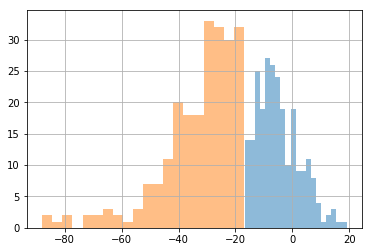

In [177]:
voxc1_hardest_trials.groupby('label').plda_score.hist(alpha=0.5, bins=20)

label
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: plda_score, dtype: object

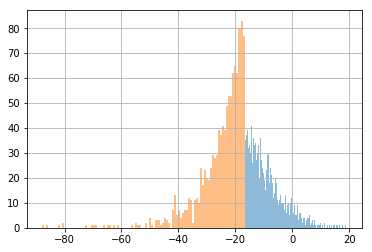

In [188]:
voxc1_bad_trial.groupby('label').plda_score.hist(alpha=0.5, bins=100)

### Score Fusion

단순히 더하는 거로는... 시너지가 없다. 그냥 voxc12를 많이 섞을수록 점점 좋아진다.

In [105]:
al = 0.5
fusion_pos_score = voxc1_pos_score*(1-al) + voxc12_pos_score*al
fusion_neg_score = voxc1_neg_score*(1-al) + voxc12_neg_score*al

In [106]:
from eval.score_utils import compute_eer
eer, fusion_thres = compute_eer(fusion_pos_score, fusion_neg_score)

eer:3.897% at threshold -9.7755


In [147]:
len(set(voxc1_bad_trial.index) & set(voxc12_bad_trial.index)) / len(voxc12_bad_trial.index)

0.5946173254835997

In [ ]:
plda_pos_trials.hist(bins=100)
plt.xlim([-20, 20])

In [ ]:
plda_neg_trials.hist(bins=100)
plt.xlim([-20, 20])

## Wav listening

In [ ]:
from IPython.display import Audio 
from IPython.display import display 
import os

def idx2wav(base_dir, idx):
    spk = idx[:7]
    session = idx[8:19]
    record_id = idx[20:]
    file = '/'.join([spk, session, record_id]) + '.wav'
    return os.path.join(base_dir, file)

def display_audio_list(audio_paths):
    if isinstance(audio_paths, str):
        audio_paths = [audio_paths]
        
    for path in audio_paths:
        print(path)
        display(Audio(path))
        
def display_audio_df(base_dir, audio_df):        
    for idx, row in audio_df.iterrows():
        enroll = row.enroll
        test = row.test
        print(enroll)
        print(test)
        print(row.score)
        display(Audio(idx2wav(base_dir, enroll)))        
        display(Audio(idx2wav(base_dir, test)))

In [ ]:
display_audio_df('/dataset/SV_sets/voxceleb1/test/wav', plda_pos_trials.sort_values('score')[:20])

In [ ]:
display_audio_df('/dataset/SV_sets/voxceleb1/test/wav', plda_neg_trials.sort_values('score', ascending=False)[:20])

In [ ]:
plda_neg_trials['enroll_spk'] = plda_neg_trials.enroll.apply(lambda x: x[:7])
plda_neg_trials['test_spk'] = plda_neg_trials.test.apply(lambda x: x[:7])

In [ ]:
score_stat = plda_neg_trials.groupby(['enroll_spk', 'test_spk']).mean()

In [ ]:
score_stat = score_stat.sort_values('score', ascending=False)

In [ ]:
score_stat